In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'legend.fontsize': 'xx-large',
          #'font.size': 16,
          'axes.titlesize': 'xx-large',
          'figure.titlesize': 'xx-large',}
pylab.rcParams.update(params)

In [3]:
df_sac = pd.read_csv('default SAC 500 norm space results\KPIs.csv',
                     index_col=0)

In [6]:
key_kpi = ['cost_total','daily_peak_average','electricity_consumption_total','ramping_average']

In [7]:
mask_bin = df_sac.columns[df_sac.columns.str.contains('binary_myPGD')]
mask_toggle = df_sac.columns[df_sac.columns.str.contains('toggle')]

In [8]:
mask_compare = [#'baseline',
                'untargeted_binary_myPGD_5%',
                'toggle_binary_myPGD_5%',
                'untargeted_binary_myPGD_03_mask_time',
                'toggle_binary_myPGD_03_mask_time',
                # 'untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs',
                # 'toggle_binary_myPGD_03_mask_time_and_solar_scale_consumption_eps_clipped',
                ]
legend_names = [
                'eps=0.05, PGD Bifurcated',
                'eps=0.05, PGD Bifurcated, Toggle-Targeted',
                'eps=0.03 PGD Bifrucated, Masked Temporal Features',
                'eps=0.03 PGD Bifrucated, Toggle-Targeted, Masked Temporal Features',
                # 'eps=0.03 PGD Bifrucated, Masked Temporal and Solar Generation Features,\nScaled eps for Net Consumption, Clipped Observations',
                # 'eps=0.03 PGD Bifrucated, Toggle-Targeted,\nMasked Temporal and Solar Generation Features,\nScaled eps for Net Consumption, Clipped Observations',
]
names_dict = dict(zip(mask_compare, legend_names))

Calculate adversarial regret

In [10]:
df_regret = df_sac[mask_compare].sub(df_sac['baseline'].values, axis='rows')

In [12]:
df_ppo = pd.read_csv(r'20 bin PPO 500 results\KPIs.csv',
                     index_col=0)

In [13]:
mask_ppo = df_ppo.columns[df_ppo.columns.str.contains('binary|toggle')]
df_ppo[mask_ppo]

,untargeted_binary_myPGD_05,toggle_binary_myPGD_05,untargeted_binary_myPGD_05_mask_time,untargeted_binary_myPGD_03_mask_time,untargeted_binary_myPGD_03_mask_time_scale_solar_and_consumption_eps
cost_function,,,,,
annual_peak_average,1.189929,1.095736,1.272315,1.182043,1.420853
carbon_emissions_total,0.961659,0.924140,0.931910,0.897824,0.896728
cost_total,0.914933,0.852194,0.870856,0.824304,0.822337
daily_one_minus_load_factor_average,0.983696,0.981671,1.116276,0.998957,1.010155
daily_peak_average,1.140678,1.041479,1.073321,0.961169,0.954841
electricity_consumption_total,0.961546,0.928078,0.934203,0.904310,0.903735
monthly_one_minus_load_factor_average,1.014428,1.004352,1.011215,0.998609,0.992092
ramping_average,1.524575,1.498865,1.422487,1.242503,1.236180
zero_net_energy,1.117022,1.120943,1.115737,1.110701,1.110859


It appears that the toggle requires a larger adv budget than simple bifurcation to be effective

In [14]:
df_regret_ppo = df_ppo[['untargeted_binary_myPGD_05','toggle_binary_myPGD_05']].sub(df_ppo['baseline'].values, axis='rows')

Bifucated PGD had an ASR of 62.8%, while it was 36% for the toggled attack

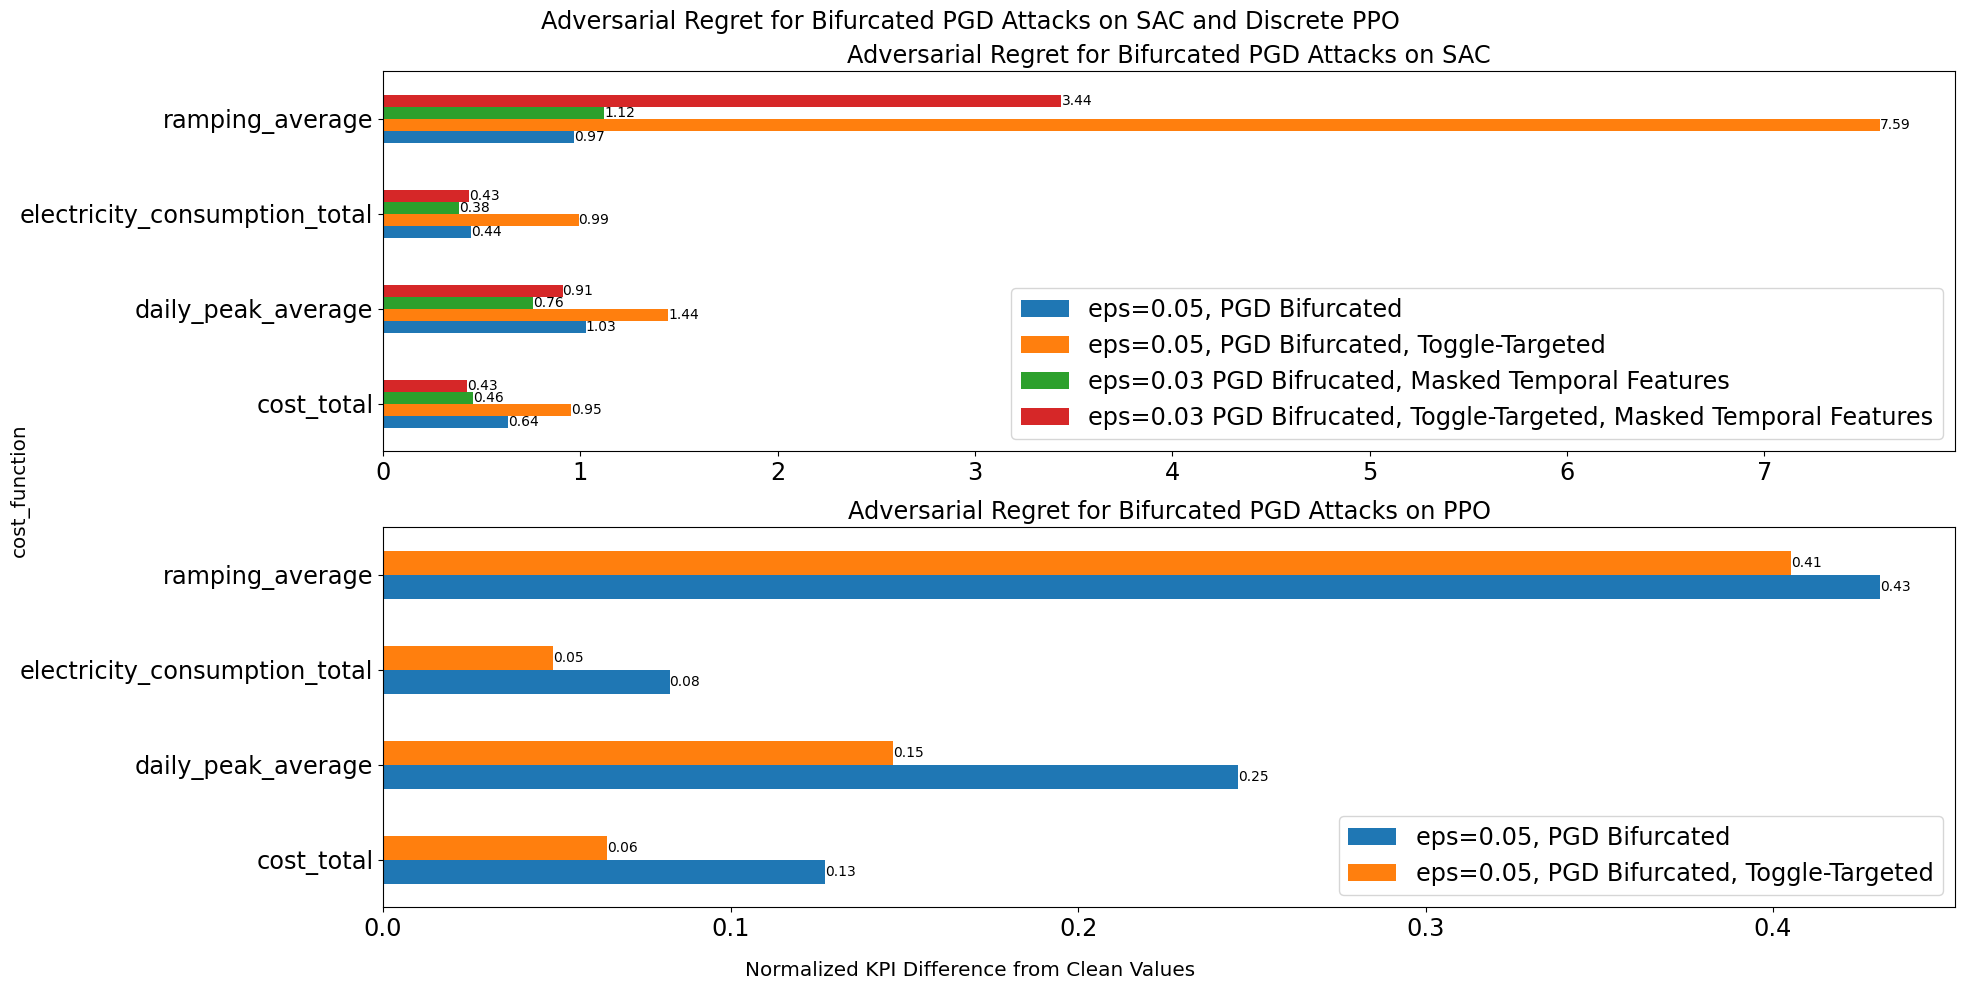

In [17]:
fig = plt.figure(figsize=[20,10],)
fig.suptitle('Adversarial Regret for Bifurcated PGD Attacks on SAC and Discrete PPO')
fig.supxlabel('Normalized KPI Difference from Clean Values',
              fontsize='x-large')
fig.supylabel('cost_function',
              fontsize='x-large')

plt.subplot(2, 1, 1) #(row, col, plt#)
ax = df_regret.loc[key_kpi].rename(columns=names_dict).plot.barh(
    title='Adversarial Regret for Bifurcated PGD Attacks on SAC',
    ax=plt.gca(),
)
ax.legend(
    )
ax.set_ylabel(None)
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')

plt.subplot(2, 1, 2) #(row, col, plt#)
ax = df_regret_ppo.loc[key_kpi].plot.barh(
    title='Adversarial Regret for Bifurcated PGD Attacks on PPO',
    ax=plt.gca(),
)
ax.legend(['eps=0.05, PGD Bifurcated',
            'eps=0.05, PGD Bifurcated, Toggle-Targeted',]
    )
ax.set_ylabel(None)
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')

plt.tight_layout()
